In [ ]:
# GMP duomenų analizė
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/b8d1b280f55e45b3b8596d833584c8e5_0/about
# 
# Klausimai:
# Ar buvo mėnesių, kurie išssikirtų gaisringumu?
# Ar buvo mėnesių, kurie išssikirtų didelių gaisrų kiekiu? (2 ir daugiau autocisternos važiuoja) 

# kokios vyraujančios 5 GMP kvietimo priežastys? Pateikite procentinį įvertinimą.
# ar yra mėnesių, išsiskiriančių trukdančių skambučių gausa?
# 
# pateikite top 5-kias priežastis, dėl kurių buvo kviesta policija.
# Pateikite procentinį įvertinimą.

# Pasirinkite 1-ną policijos kvietimo priežastį iš TOP5 ir palyginkite su kvietimais dėl KET, 
# kiekvienam mėnesiui. Ar yra mėnesių, kada dėl KET kviečiama mažiau, 
# nei dėl jūsų pasirinktos priežasties?

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import glob

In [37]:
df = pd.read_csv(r'C:\Users\pauli\Downloads\BPC2.csv')
df.head(1)

,X,Y,ivykio_tipo_kodas,ivykio_id,metai,menuo,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas,object_id
0,455179,6202578,2.1,8a05b17d59f0,2022,3,BPC-GMP,GMP įvykis,1


In [38]:
df.head()

,X,Y,ivykio_tipo_kodas,ivykio_id,metai,menuo,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas,object_id
0,455179,6202578,2.1,8a05b17d59f0,2022,3,BPC-GMP,GMP įvykis,1
1,496996,6088060,2.1,c9ffee4c15df,2022,3,BPC-GMP,GMP įvykis,2
2,396311,6243084,2.1,c349aa73f059,2022,3,BPC-GMP,GMP įvykis,3
3,509278,6113549,2.1,23b71b2f9a07,2022,3,BPC-GMP,GMP įvykis,4
4,323452,6174157,6.1.2,a15a6960d21f,2022,3,Policijos įvykiai,KET pažeidimas,5


In [47]:
dfgaisrai = df[['zemesnis_ivykio_tipas', 'object_id']].groupby('zemesnis_ivykio_tipas').count().reset_index()
dfgaisrai = dfgaisrai[dfgaisrai['zemesnis_ivykio_tipas'].str.contains('Gaisr')]
dfgaisrai.head(10)

,zemesnis_ivykio_tipas,object_id
32,Gaisrai,2
33,Gaisras (SA),349
34,Gaisras 0,6766
35,Gaisras 1,9562
36,Gaisras 1AK,2010
37,Gaisras 2,801
38,Gaisras 3,180
39,Gaisras 4,34
40,Gaisras 5,4
41,"Gaisras pastate, nežinoma situacija",2224


In [48]:
dfgaisrai3 = df[df['zemesnis_ivykio_tipas'].str.contains('Gaisr', na =False)]
dfgaisrai3 = dfgaisrai3[['menuo', 'object_id']].groupby('menuo').count().reset_index()
dfgaisrai3.head(12)

,menuo,object_id
0,1,2312
1,2,1838
2,3,2811
3,4,2398
4,5,2495
5,6,2348
6,7,893
7,8,1256
8,9,691
9,10,1202


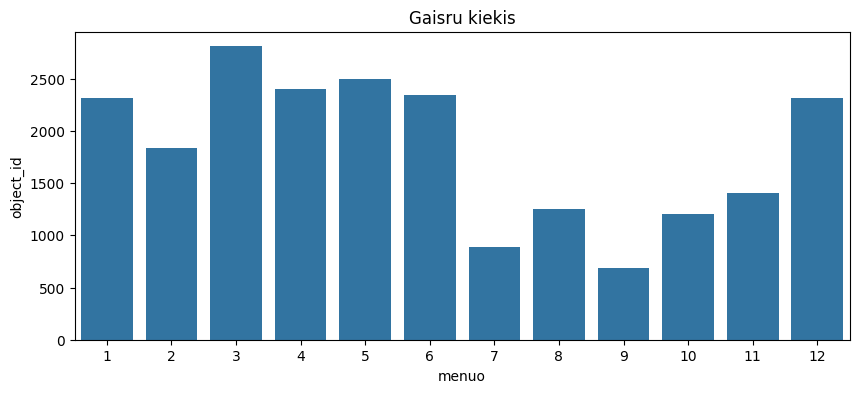

In [89]:
fig, axis = plt.subplots(figsize=(10, 4))
sns.barplot(data=dfgaisrai3, x = 'menuo', y='object_id')
plt.title('Gaisru kiekis')

plt.show()

In [49]:
dfgaisrai2 = df[df['zemesnis_ivykio_tipas'].str.contains('Gaisr', na=False)]
dfgaisrai2 = dfgaisrai2[~dfgaisrai2['zemesnis_ivykio_tipas'].str.contains('0')]
dfgaisrai2 = dfgaisrai2[['menuo', 'object_id']].groupby('menuo').count().reset_index()
dfgaisrai2.head(12)

,menuo,object_id
0,1,1766
1,2,1479
2,3,1918
3,4,1563
4,5,1560
5,6,1316
6,7,602
7,8,698
8,9,469
9,10,763


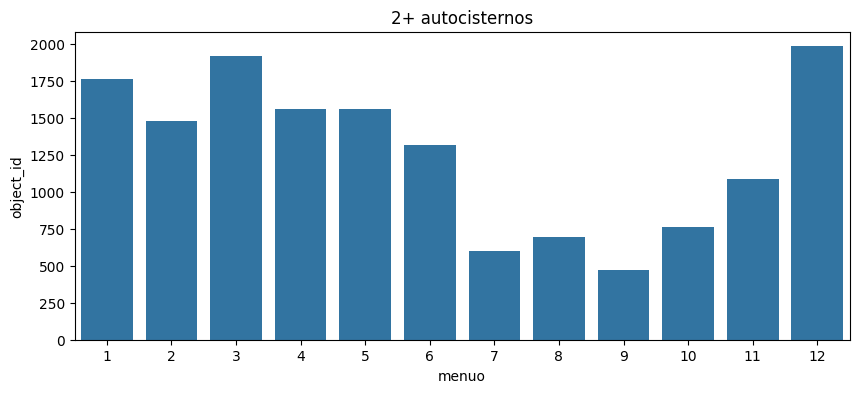

In [90]:
fig, axis = plt.subplots(figsize=(10, 4))
sns.barplot(data=dfgaisrai2, x = 'menuo', y='object_id')
plt.title('2+ autocisternos')

plt.show()

In [65]:
df5priezastys = df[['zemesnis_ivykio_tipas', 'object_id']].groupby('zemesnis_ivykio_tipas').count().reset_index()
df5priezastys = df5priezastys.sort_values(by='object_id', ascending=False).head(5)

df5priezastys['object_id'] = df5priezastys['object_id'].apply(lambda a: round(a / len(df) * 100, 0))

df5priezastys.head()

,zemesnis_ivykio_tipas,object_id
31,GMP įvykis,38.0
55,KET pažeidimas,10.0
141,Įvairūs viešosios tvarkos pažeidimai,8.0
130,Turtinė veika anksčiau,4.0
118,Smurtas artimoje aplinkoje,4.0


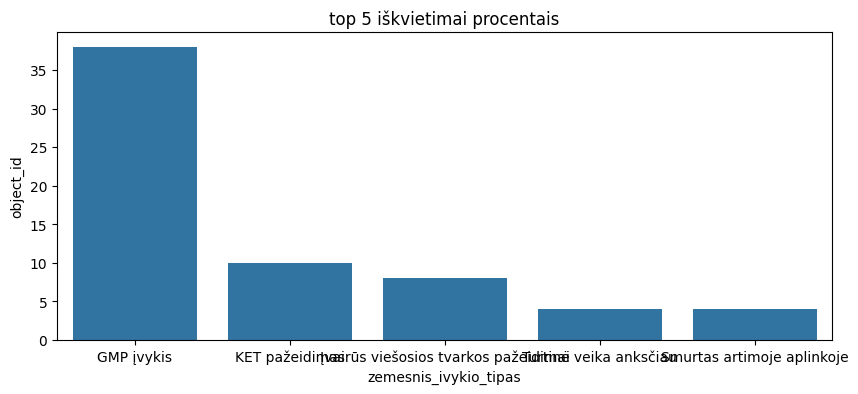

In [92]:
fig, axis = plt.subplots(figsize=(10, 4))
sns.barplot(data=df5priezastys, x = 'zemesnis_ivykio_tipas', y='object_id')
plt.title('top 5 iškvietimai procentais')

plt.show()

In [64]:
dftrukdo = df[df['zemesnis_ivykio_tipas'].str.contains('TRUKDANTIS', na=False)]
dftrukdo = dftrukdo[['menuo', 'object_id']].groupby('menuo').count().reset_index()
dftrukdo.head(12)

,menuo,object_id
0,1,865
1,2,879
2,3,913
3,4,1010
4,5,896
5,6,929
6,7,541
7,8,494
8,9,296
9,10,445


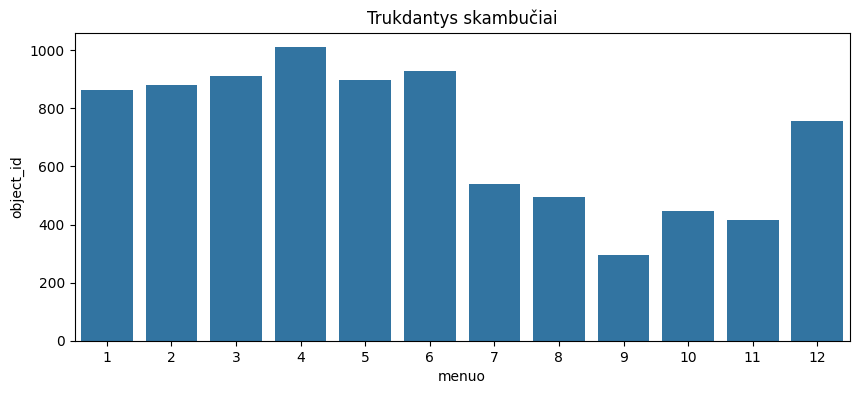

In [93]:
fig, axis = plt.subplots(figsize=(10, 4))
sns.barplot(data=dftrukdo, x = 'menuo', y='object_id')
plt.title('Trukdantys skambučiai')

plt.show()

In [95]:
dfpolicija5 = df[df['aukstesnis_ivykio_tipas'].str.contains('Policijos', na=False)]
dfpolicija5 = dfpolicija5[['zemesnis_ivykio_tipas', 'object_id']].groupby('zemesnis_ivykio_tipas').count().reset_index()
dfpolicija5 = dfpolicija5.sort_values(by='object_id', ascending=False)[:5]



dfpolicija5['object_id'] = dfpolicija5['object_id'].apply(lambda a: round(a / len(df) * 100, 0))

dfpolicija5.head()

,zemesnis_ivykio_tipas,object_id
6,KET pažeidimas,10.0
30,Įvairūs viešosios tvarkos pažeidimai,8.0
25,Turtinė veika anksčiau,4.0
22,Smurtas artimoje aplinkoje,4.0
13,Neklasifikuoti,3.0


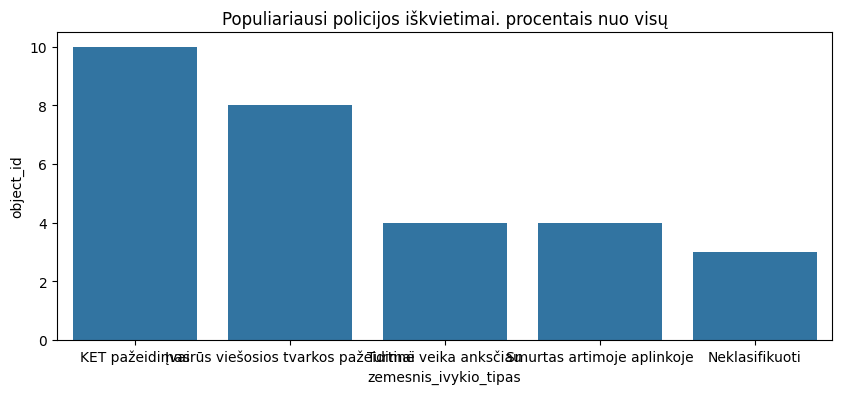

In [96]:
fig, axis = plt.subplots(figsize=(10, 4))
sns.barplot(data=dfpolicija5, x = 'zemesnis_ivykio_tipas', y='object_id')
plt.title('Populiariausi policijos iškvietimai. procentais nuo visų')

plt.show()

In [74]:
dfpolicija5 = df[df['aukstesnis_ivykio_tipas'].str.contains('Policijos', na=False)]
dfKET = dfpolicija5[dfpolicija5['zemesnis_ivykio_tipas'].str.contains('KET', na=False)]
dfKET = dfKET[['menuo', 'object_id']].groupby('menuo').count().reset_index()
dfivairus = dfpolicija5[dfpolicija5['zemesnis_ivykio_tipas'].str.contains('Įvairūs viešosios tvarkos pažeidimai', na=False)]
dfivairus = dfivairus[['menuo', 'object_id']].groupby('menuo').count().reset_index()

dfivairus.head()



,menuo,object_id
0,1,14298
1,2,13232
2,3,15302
3,4,16499
4,5,17877


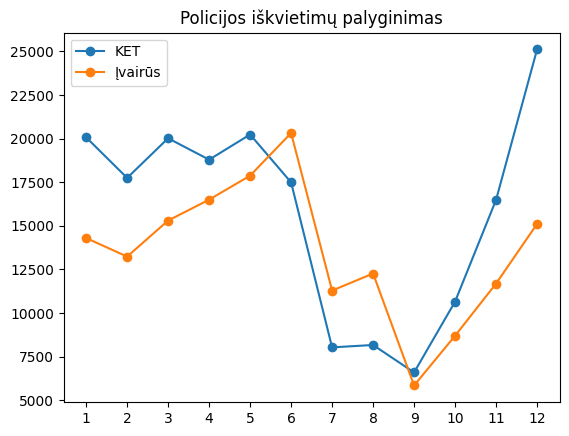

In [84]:
fig, axis = plt.subplots()


    
axis.plot(dfKET['menuo'], dfKET['object_id'], label = 'KET', marker ='o')
axis.plot(dfKET['menuo'], dfivairus['object_id'], label = 'Įvairūs', marker ='o')
axis.set_xticks(dfKET['menuo'])
axis.legend(loc='best')
plt.title('Policijos iškvietimų palyginimas')
plt.show()

In [ ]:
# https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/27c22303570541fd9dae7299be45d601_0/about
# Ar yra skirtumas tarp to, kas administruoja
# pastatą, ir noro renovuotis? (Suraskite, kiek procentų yra renovavęsi
# pagal administravimo pobūdį)
# Ar galima teigti, kad kuo senesnis pastatas, tuo gyventojai
# nori labiau renovacijos? 
# (pastatų amžius vs renovuotų tokio amžiaus pastatų kiekis)
# kurioje seniūnijoje daugiausiasi renovuotų pastatų?
# kokios trys seniūnijos yra renovacijos priekyje?

In [126]:
dfk = pd.read_csv(r'C:\Users\pauli\Downloads\kaunodaugiabuciai.csv')
dfk.head(1)

,X,Y,vda_id,seniunija,gatve,namo_nr,butu_sk,negyvenamu_sk,aukstu_sk,namo_plotas,zemes_plotas,statybos_metai,valdymo_forma,valdytojas,admin_pabaiga,ar_perduotas,bukle,atlikti_darbai,object_id,geom
0,NaN,NaN,4fc5a7d3836798b,NaN,Vilniaus g.,24A,NaN,0,NaN,0.0,0.0,NaN,Bendrija,NaN,NaN,1,NaN,NaN,1,NaN


In [133]:
dfk1=dfk[['valdytojas', 'object_id']].groupby('valdytojas').count().reset_index().sort_values(by='object_id', ascending=False)[:10]
dfrenovuoti = dfk[dfk['bukle'].str.contains('Renovuotas', na=False)]
dfrenovuoti = dfrenovuoti[['valdytojas', 'object_id']].groupby('valdytojas').count().reset_index().sort_values(by='valdytojas', ascending=False)
dfnerenovuoti = dfk[dfk['bukle'].str.contains('Nerenovuotas', na=False)]
dfnerenovuoti = dfnerenovuoti[['valdytojas', 'object_id']].groupby('valdytojas').count().reset_index().sort_values(by='valdytojas', ascending=False)

dfrenovuoti['nerenovuoti']=dfnerenovuoti['object_id']
dfrenovuoti['renovuotiproc']=round(dfrenovuoti['object_id']/(dfrenovuoti['object_id']+dfnerenovuoti['object_id'])*100, 0)

# dfrenovuoti=dfrenovuoti.sort_values(by = 'renovuotiproc', ascending= False)
result = pd.merge(dfk1, dfrenovuoti, how='left', on='valdytojas')

dfk1.head(20)

,valdytojas,object_id
1666,UAB Kauno butų ūkis,688
1669,UAB Mano Būstas Kaunas,446
498,"Civinity namai Kaunas, UAB",393
1668,UAB Mano Būstas Dainava,222
499,"Civinity namai, UAB",121
1665,"UAB ""Santermita""",120
1676,nėra,116
154,222-oji daugiabučių namų savininkų bendrija,27
163,231-oji gyvenamųjų namų eksploatavimo bendrija,23
584,"DNSB ""Parko apartamentai""",23


In [ ]:
#Suraskite 2013-2023 metų eismo įvykuose daugiausiai kartų užfiksuotą automobilių 
# a) gamintoją 
# b) modelį. Kiekvienais metais tas gamintojas/modelis gali būti skirtingas - pateikite bar/barh grafikus.
# Kiek iš užfiksuotų automobilių turėjo Kasko draudimą?